In [3]:
full = pd.read_csv('data/runs/full.csv').drop('Unnamed: 0', axis=1)
clean = full[full['Quality']>-0.95]
clean['started'] = pd.to_datetime(clean['started'])
clean = clean[clean['started'] > pd.to_datetime('2020-04-15 18:00:00')]
full['started'] = pd.to_datetime(full['started'])
full = full[full['started'] > pd.to_datetime('2020-04-15 18:00:00')]

/rwthfs/rz/cluster/home/kz035322/Thesis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats

In [13]:
clean = pd.read_csv('data/runs/clean.csv')

In [4]:
clean[['Drug', 'r2_score']].groupby('Drug').describe().sort_values(('r2_score', 'count'), ascending=False).head()

r2_score                                                    \
               count      mean       std       min       25%       50%   
Drug                                                                     
Selumetinib   4512.0  0.189548  0.177463 -0.586784  0.003512  0.215650   
Nutlin-3      4480.0  0.042574  0.222276 -1.956753 -0.029524  0.013063   
Paclitaxel    4479.0  0.114114  0.157428 -0.866935 -0.003286  0.121838   
Saracatinib   4452.0  0.089953  0.155960 -1.412134 -0.006891  0.083961   
TAE684        4451.0  0.054032  0.166655 -0.774732 -0.022764  0.016381   

                                 
                  75%       max  
Drug                             
Selumetinib  0.337072  0.598656  
Nutlin-3     0.129311  0.738862  
Paclitaxel   0.223766  0.479926  
Saracatinib  0.181256  0.586263  
TAE684       0.126441  0.693535

## Model testing statsmodel

In [5]:
clean.columns

Index(['C', 'Drug', 'algorithm', 'alpha', 'bootstrap', 'cache_size', 'coef0',
       'copy_X', 'criterion', 'degree', 'epsilon', 'fit_intercept', 'gamma',
       'kernel', 'l1_ratio', 'leaf_size', 'max_depth', 'max_features',
       'max_iter', 'max_leaf_nodes', 'mean_absolute_error',
       'mean_squared_error', 'median_absolute_error', 'metric',
       'metric_params', 'min_impurity_decrease', 'min_impurity_split',
       'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf',
       'n_estimators', 'n_jobs', 'n_neighbors', 'normalize', 'oob_score', 'p',
       'positive', 'precompute', 'presort', 'r2_score', 'random_state', 'run',
       'selection', 'shrinking', 'splitter', 'tol', 'verbose', 'warm_start',
       'weights', 'operation', 'started', 'time', 'status', 'label', 'ajive',
       'ccle', 'ctrp', 'cutoff', 'drugs', 'feda', 'fs', 'gdsc', 'metric_drug',
       'model', 'n', 'norm', 'test', 'threshold', 'step', 'r_2_mean',
       'r_2_std', 'seconds', 'datasets', 

In [6]:
full_short = full[['Drug', 'r2_score', 'mean_squared_error', 'ajive', 'ccle', 'ctrp','gdsc', 'feda', 'fs', 'metric_drug', 'model', 'n', 'norm', 'datasets', 'Quality']]
short = clean[['Drug', 'r2_score', 'mean_squared_error', 'ajive', 'ccle', 'ctrp','gdsc', 'feda', 'fs', 'metric_drug', 'model', 'n', 'norm', 'datasets', 'Quality']]

In [7]:
d1 = short[short['Drug']=='Selumetinib'].drop('Drug', axis=1)

In [8]:
d1['ajive'] = d1['ajive'].fillna(0)
d1['norm'] = d1['norm'].fillna('None')

In [9]:
d1 = pd.get_dummies(d1, columns=['ajive', 'metric_drug', 'fs', 'model', 'norm', 'datasets'], drop_first=True)

In [10]:
d1 = d1.replace({True:1, False:0})

In [11]:
d1.head()

,r2_score,mean_squared_error,ccle,ctrp,gdsc,feda,n,Quality,ajive_1.0,ajive_2.0,...,model_ElasticNet,model_KNeighborsRegressor,model_RandomForestRegressor,model_SVR,norm_MinMaxScaler,norm_None,norm_QuantileTransformer,norm_StandardScaler,datasets_2,datasets_3
15,0.304388,0.043233,0,1,1,0,0.100451,-0.538826,0,0,...,1,0,0,0,0,0,0,1,1,0
68,0.283115,0.050470,1,1,1,0,0.007475,-0.538826,0,0,...,0,0,0,0,1,0,0,0,0,1
103,0.098804,0.061326,1,0,0,1,0.089648,-0.303030,0,0,...,0,0,0,0,0,0,0,1,0,0
135,0.285679,0.049029,1,1,1,0,0.091667,-0.303030,0,0,...,1,0,0,0,1,0,0,0,0,1
150,0.313713,0.049590,1,1,0,0,0.075733,-0.538826,0,0,...,0,0,0,1,1,0,0,0,1,0


In [12]:
X = d1.drop(['r2_score', 'mean_squared_error', 'ccle'], axis=1)
y = d1['r2_score']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=X['Quality'])

# Statsmodel

In [14]:
import statsmodels.api as sm
mod = sm.OLS(y_train, X_train)
results = mod.fit()

In [15]:
results.summary2(alpha=0.01)

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
============================================================================
Model:                 OLS                 Adj. R-squared:        0.544     
Dependent Variable:    r2_score            AIC:                   -4768.1586
Date:                  2020-05-25 08:00    BIC:                   -4621.1151
No. Observations:      3384                Log-Likelihood:        2408.1    
Df Model:              23                  F-statistic:           176.7     
Df Residuals:          3360                Prob (F-statistic):    0.00      
R-squared:             0.547               Scale:                 0.014208  
----------------------------------------------------------------------------
                             Coef.  Std.Err.    t     P>|t|   [0.005  0.995]
----------------------------------------------------------------------------
ctrp                         0.0300   0.0073   4.0925 0.0000  0.0111  0.0488
gdsc                         0.0030   0.0067   0.4518 0.6514 -0.0142  0.0203
feda                        -0.2392   0.0055 -43.1416 0.0000 -0.2535 -0.2249
n                            0.2123   0.0371   5.7206 0.0000  0.1166  0.3079
Quality                     -0.4285   0.0387 -11.0727 0.0000 -0.5283 -0.3288
ajive_1.0                   -0.0206   0.0067  -3.0929 0.0020 -0.0379 -0.0034
ajive_2.0                   -0.0280   0.0065  -4.2818 0.0000 -0.0449 -0.0112
ajive_3.0                   -0.0236   0.0066  -3.5581 0.0004 -0.0407 -0.0065
metric_drug_AUC_IC50        -0.0934   0.0109  -8.5761 0.0000 -0.1214 -0.0653
fs_ElasticNet               -0.0195   0.0084  -2.3195 0.0204 -0.0412  0.0022
fs_Lasso                    -0.0184   0.0073  -2.5189 0.0118 -0.0372  0.0004
fs_RandomForestRegressor     0.0091   0.0079   1.1580 0.2469 -0.0112  0.0295
fs_f_regression              0.0180   0.0073   2.4699 0.0136 -0.0008  0.0367
fs_mutual_info_regression    0.0158   0.0075   2.0978 0.0360 -0.0036  0.0352
model_ElasticNet             0.1709   0.0068  25.2963 0.0000  0.1535  0.1883
model_KNeighborsRegressor    0.2034   0.0074  27.5531 0.0000  0.1844  0.2224
model_RandomForestRegressor  0.1974   0.0069  28.5517 0.0000  0.1796  0.2152
model_SVR                    0.2117   0.0071  29.9753 0.0000  0.1935  0.2299
norm_MinMaxScaler            0.0080   0.0077   1.0381 0.2993 -0.0119  0.0279
norm_None                    0.0101   0.0068   1.4886 0.1367 -0.0074  0.0277
norm_QuantileTransformer     0.0364   0.0079   4.5976 0.0000  0.0160  0.0567
norm_StandardScaler         -0.0233   0.0079  -2.9379 0.0033 -0.0437 -0.0029
datasets_2                  -0.0777   0.0081  -9.6532 0.0000 -0.0985 -0.0570
datasets_3                  -0.0536   0.0131  -4.0793 0.0000 -0.0874 -0.0197
----------------------------------------------------------------------------
Omnibus:                 214.380          Durbin-Watson:             2.027  
Prob(Omnibus):           0.000            Jarque-Bera (JB):          902.993
Skew:                    -0.133           Prob(JB):                  0.000  
Kurtosis:                5.517            Condition No.:             34     
============================================================================

"""

In [16]:
coef = results.summary2(alpha=0.01).tables[1]

In [17]:
coef[coef['[0.005']*coef['0.995]'] > 0]

,Coef.,Std.Err.,t,P>|t|,[0.005,0.995]
ctrp,0.029967,0.007322,4.092508,4.367647e-05,0.011095,0.048839
feda,-0.239227,0.005545,-43.141554,9.881313e-324,-0.253518,-0.224935
n,0.212257,0.037104,5.720618,1.154333e-08,0.116629,0.307884
Quality,-0.428539,0.038702,-11.072738,5.161189e-28,-0.528286,-0.328792
ajive_1.0,-0.020647,0.006676,-3.092949,1.998054e-03,-0.037852,-0.003442
ajive_2.0,-0.028045,0.006550,-4.281805,1.905694e-05,-0.044926,-0.011164
ajive_3.0,-0.023615,0.006637,-3.558104,3.787063e-04,-0.040721,-0.006510
metric_drug_AUC_IC50,-0.093365,0.010887,-8.576067,1.475535e-17,-0.121423,-0.065307
model_ElasticNet,0.170932,0.006757,25.296329,2.201377e-129,0.153517,0.188347
model_KNeighborsRegressor,0.203419,0.007383,27.553104,7.489278e-151,0.184392,0.222447


# Drug agnostic linear regression

In [18]:
d_r = clean[['Drug', 'r2_score']].groupby('Drug').mean()

In [19]:
clean = pd.read_csv('data/runs/clean.csv')

In [20]:
short2 = clean[['r2', 'mean_squared_error', 'ajive', 'ccle', 'ctrp','gdsc', 'feda', 'fs', 'metric_drug', 'model', 'n', 'norm', 'datasets', 'Quality']]

In [21]:
short2['ajive'] = short2['ajive'].fillna(0)
short2['norm'] = short2['norm'].fillna('None')

/rwthfs/rz/cluster/home/kz035322/Thesis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/rwthfs/rz/cluster/home/kz035322/Thesis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
short2 = pd.get_dummies(short2, columns=['ajive', 'metric_drug', 'fs', 'model', 'norm', 'datasets'], drop_first=True)

In [23]:
short2 = short2.replace({True:1, False:0})

In [24]:
from sklearn.model_selection import train_test_split
X = short2.drop(['r2', 'mean_squared_error', 'ccle'], axis=1)
y = short2['r2']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [25]:
import statsmodels.api as sm

mod = sm.OLS(y_train, X_train)
results = mod.fit()
results.summary2(alpha=0.01)

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.097     
Dependent Variable:     r2               AIC:                         25327.0235
Date:                   2020-05-25 08:00 BIC:                         25552.7658
No. Observations:       89853            Log-Likelihood:              -12640.   
Df Model:               24               F-statistic:                 402.2     
Df Residuals:           89829            Prob (F-statistic):          0.00      
R-squared (uncentered): 0.097            Scale:                       0.077593  
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    t     P>|t|   [0.005  0.995]
--------------------------------------------------------------------------------
ctrp                             0.0100   0.0024   4.1395 0.0000  0.0038  0.0162
gdsc                             0.0339   0.0023  14.9060 0.0000  0.0280  0.0397
feda                            -0.1412   0.0024 -58.1222 0.0000 -0.1475 -0.1350
n                               -0.0383   0.0157  -2.4456 0.0145 -0.0787  0.0020
Quality                          0.0039   0.0019   2.0134 0.0441 -0.0011  0.0089
ajive_1.0                       -0.0286   0.0029  -9.8031 0.0000 -0.0361 -0.0211
ajive_2.0                       -0.0350   0.0029 -12.1388 0.0000 -0.0425 -0.0276
ajive_3.0                       -0.0265   0.0029  -9.0864 0.0000 -0.0340 -0.0190
metric_drug_AUC_IC50            -0.0091   0.0019  -4.8962 0.0000 -0.0139 -0.0043
fs_ElasticNet                   -0.0386   0.0034 -11.4241 0.0000 -0.0473 -0.0299
fs_Lasso                        -0.0404   0.0030 -13.5199 0.0000 -0.0481 -0.0327
fs_RandomForestRegressor        -0.0356   0.0033 -10.8985 0.0000 -0.0440 -0.0272
fs_f_regression                 -0.0333   0.0030 -11.0436 0.0000 -0.0410 -0.0255
fs_mutual_info_regression       -0.0224   0.0031  -7.2308 0.0000 -0.0304 -0.0145
model_ElasticNet                 0.1356   0.0027  50.7318 0.0000  0.1287  0.1424
model_KNeighborsRegressor        0.1477   0.0032  46.2102 0.0000  0.1395  0.1559
model_RandomForestRegressor      0.1526   0.0029  52.9370 0.0000  0.1452  0.1600
model_SVR                        0.0676   0.0030  22.8130 0.0000  0.0600  0.0752
norm_MinMaxScaler               -0.0211   0.0033  -6.3753 0.0000 -0.0296 -0.0126
norm_None                       -0.0354   0.0027 -13.3462 0.0000 -0.0422 -0.0286
norm_QuantileTransformer        -0.0173   0.0034  -5.0188 0.0000 -0.0262 -0.0084
norm_StandardScaler             -0.0660   0.0034 -19.3886 0.0000 -0.0748 -0.0573
datasets_2                       0.0173   0.0025   7.0315 0.0000  0.0110  0.0236
datasets_3                       0.0028   0.0043   0.6524 0.5141 -0.0082  0.0138
--------------------------------------------------------------------------------
Omnibus:               187590.221        Durbin-Watson:           1.989         
Prob(Omnibus):         0.000             Jarque-Bera (JB):        2203545778.713
Skew:                  -17.521           Prob(JB):                0.000         
Kurtosis:              769.385           Condition No.:           24            
================================================================================

"""

In [26]:
coef = results.summary2(alpha=0.01).tables[1]

In [27]:
coef[coef['[0.005']*coef['0.995]'] > 0]

,Coef.,Std.Err.,t,P>|t|,[0.005,0.995]
ctrp,0.009974,0.002410,4.139470,3.484266e-05,0.003768,0.016181
gdsc,0.033875,0.002273,14.906050,3.457292e-50,0.028021,0.039729
feda,-0.141249,0.002430,-58.122233,0.000000e+00,-0.147509,-0.134989
ajive_1.0,-0.028606,0.002918,-9.803089,1.120949e-22,-0.036123,-0.021090
ajive_2.0,-0.035044,0.002887,-12.138846,6.989477e-34,-0.042480,-0.027607
ajive_3.0,-0.026452,0.002911,-9.086428,1.043524e-19,-0.033950,-0.018953
metric_drug_AUC_IC50,-0.009112,0.001861,-4.896212,9.787111e-07,-0.013906,-0.004318
fs_ElasticNet,-0.038558,0.003375,-11.424129,3.324228e-30,-0.047252,-0.029864
fs_Lasso,-0.040379,0.002987,-13.519896,1.310908e-41,-0.048073,-0.032686
fs_RandomForestRegressor,-0.035594,0.003266,-10.898470,1.219816e-27,-0.044007,-0.027181


In [28]:
a = clean[['model', 'fs', 'r2']].groupby(['model', 'fs']).describe()
a.index.to_flat_index()
clean['fsmodel'] = clean['fs']+clean['model']

In [29]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
m_comp = pairwise_tukeyhsd(endog=clean['r2'], groups=clean['fsmodel'], alpha=0.05)

In [30]:
m_comp.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
DecisionTreeRegressorElasticNet,DecisionTreeRegressorKNeighborsRegressor,0.0052,0.9,-0.0201,0.0305,False
DecisionTreeRegressorElasticNet,DecisionTreeRegressorRandomForestRegressor,-0.0069,0.9,-0.0281,0.0144,False
DecisionTreeRegressorElasticNet,DecisionTreeRegressorSVR,-0.1024,0.001,-0.127,-0.0778,True
DecisionTreeRegressorElasticNet,ElasticNetDecisionTreeRegressor,-0.1662,0.001,-0.1839,-0.1486,True
DecisionTreeRegressorElasticNet,ElasticNetKNeighborsRegressor,-0.0006,0.9,-0.0265,0.0252,False
DecisionTreeRegressorElasticNet,ElasticNetRandomForestRegressor,0.002,0.9,-0.0203,0.0243,False
DecisionTreeRegressorElasticNet,ElasticNetSVR,-0.0796,0.001,-0.1012,-0.058,True
DecisionTreeRegressorElasticNet,LassoDecisionTreeRegressor,-0.1656,0.001,-0.1836,-0.1476,True
DecisionTreeRegressorElasticNet,LassoElasticNet,-0.0103,0.9,-0.0279,0.0074,False
DecisionTreeRegressorElasticNet,LassoKNeighborsRegressor,-0.0119,0.9,-0.037,0.0132,False


# ANOVA

In [15]:
import patsy
import statsmodels.api as sm
f = 'r2 ~catn +Quality + fs:model + model +catn:model+ +norm:model+da:model+da+ctrp + gdsc + norm+C(datasets)+metric_drug'
y, X = patsy.dmatrices(f,clean.drop('C', axis=1), return_type='dataframe')

In [16]:
#X.columns

In [17]:
X = X.drop(['fs[T.f_regression]:model[DecisionTreeRegressor]', 'fs[T.ElasticNet]:model[ElasticNet]', 'fs[T.RandomForestRegressor]:model[RandomForestRegressor]'], axis=1)

In [18]:
mod = sm.OLS(y, X).fit()
results = pd.DataFrame(mod.summary(alpha=0.01).tables[1].data).set_index(0)
results = results.rename(columns=results.iloc[0])[1:]

In [19]:
results['[0.005'] = pd.to_numeric(results['[0.005'])
results['0.995]'] = pd.to_numeric(results['0.995]'])

In [20]:
results[results['[0.005']*results['0.995]'] > 0].sort_values('coef')

,coef,std err,t,P>|t|,[0.005,0.995]
0,,,,,,
C(datasets)[T.2],0.0165,0.002,7.532,0.000,0.011,0.022
da[T.none],0.0173,0.005,3.775,0.000,0.005,0.029
fs[T.Lasso]:model[RandomForestRegressor],0.0180,0.006,2.833,0.005,0.002,0.034
catn[T.mid],0.0199,0.005,4.014,0.000,0.007,0.033
fs[T.ElasticNet]:model[SVR],0.0217,0.007,2.955,0.003,0.003,0.041
norm[T.None],0.0241,0.008,3.110,0.002,0.004,0.044
ctrp[T.True],0.0262,0.002,11.943,0.000,0.021,0.032
fs[T.RandomForestRegressor]:model[SVR],0.0263,0.008,3.370,0.001,0.006,0.046
norm[T.StandardScaler],0.0263,0.010,2.714,0.007,0.001,0.051


In [21]:
results.shape

(83, 6)

In [22]:
results[results['[0.005']*results['0.995]'] > 0].sort_values('coef').shape

(36, 6)

In [23]:
drop = list(results[results['[0.005']*results['0.995]'] < 0].index)
drop = [i for i in drop if ':' in i]
X = X.drop(drop, axis=1)

In [24]:
mod = sm.OLS(y, X).fit()
results = pd.DataFrame(mod.summary(alpha=0.01).tables[1].data).set_index(0)
results = results.rename(columns=results.iloc[0])[1:]
results['[0.005'] = pd.to_numeric(results['[0.005'])
results['0.995]'] = pd.to_numeric(results['0.995]'])
results['coef'] = pd.to_numeric(results['coef'])

In [25]:
anova = results[results['[0.005']*results['0.995]'] > 0]
anova = anova.sort_values('coef').reset_index().rename(columns={0:'factor'})

In [131]:
anova

,factor,coef,std err,t,P>|t|,[0.005,0.995]
0,Intercept,-0.1704,0.005,-37.700,0.000,-0.182,-0.159
1,da[T.feda],-0.0872,0.004,-20.375,0.000,-0.098,-0.076
2,norm[T.StandardScaler]:model[T.SVR],-0.0850,0.011,-7.889,0.000,-0.113,-0.057
3,norm[T.StandardScaler]:model[T.RandomForestReg...,-0.0824,0.010,-8.569,0.000,-0.107,-0.058
4,norm[T.StandardScaler]:model[T.KNeighborsRegre...,-0.0814,0.012,-6.538,0.000,-0.113,-0.049
5,norm[T.StandardScaler]:model[T.ElasticNet],-0.0785,0.008,-9.585,0.000,-0.100,-0.057
6,da[T.feda]:model[T.SVR],-0.0531,0.006,-8.346,0.000,-0.069,-0.037
7,da[T.feda]:model[T.KNeighborsRegressor],-0.0483,0.008,-6.006,0.000,-0.069,-0.028
8,norm[T.None]:model[T.RandomForestRegressor],-0.0431,0.006,-7.395,0.000,-0.058,-0.028
9,catn[T.low]:model[T.KNeighborsRegressor],-0.0341,0.007,-4.703,0.000,-0.053,-0.015


In [45]:
anova[(anova['coef']>0.05)|(anova['coef']<-0.05)]

,factor,coef,std err,t,P>|t|,[0.005,0.995]
0,Intercept,-0.1704,0.005,-37.700,0.000,-0.182,-0.159
1,da[T.feda],-0.0872,0.004,-20.375,0.000,-0.098,-0.076
2,norm[T.StandardScaler]:model[T.SVR],-0.0850,0.011,-7.889,0.000,-0.113,-0.057
3,norm[T.StandardScaler]:model[T.RandomForestReg...,-0.0824,0.010,-8.569,0.000,-0.107,-0.058
4,norm[T.StandardScaler]:model[T.KNeighborsRegre...,-0.0814,0.012,-6.538,0.000,-0.113,-0.049
5,norm[T.StandardScaler]:model[T.ElasticNet],-0.0785,0.008,-9.585,0.000,-0.100,-0.057
6,da[T.feda]:model[T.SVR],-0.0531,0.006,-8.346,0.000,-0.069,-0.037
34,model[T.SVR],0.1106,0.005,24.542,0.000,0.099,0.122
35,model[T.RandomForestRegressor],0.2122,0.005,40.697,0.000,0.199,0.226
36,model[T.ElasticNet],0.2166,0.004,50.396,0.000,0.206,0.228


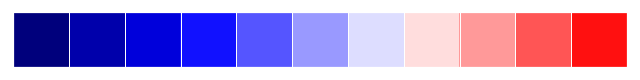

In [42]:
sns.palplot(sns.color_palette("seismic", n_colors=14)[:-3])

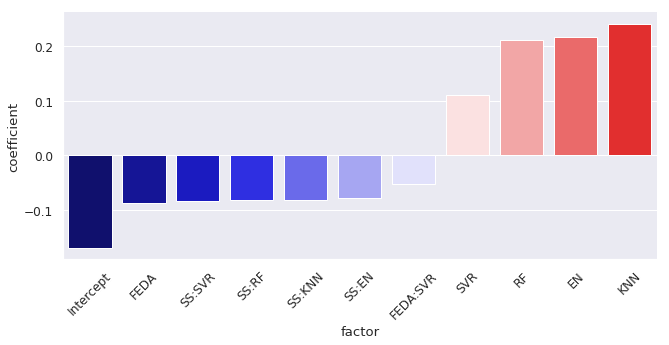

In [44]:
sns.set(font_scale=1.1)
g = sns.catplot(x='factor', y='coef', data=anova[(anova['coef']>0.05)|(anova['coef']<-0.05)],height=5, kind='bar', palette=sns.color_palette("seismic", n_colors=14)[:-3], aspect=1.9)
labels = ['Intercept', 'FEDA','SS:SVR', 'SS:RF','SS:KNN','SS:EN', 'FEDA:SVR', 
          'SVR', 'RF', 'EN', 'KNN']
g.set_xticklabels(labels,rotation=45)
g.set(ylabel='coefficient')
plt.tight_layout()
plt.savefig('graphs/anova.eps', format='eps')

In [375]:
drop = list(results[results['[0.005']*results['0.995]'] < 0].index)
drop = [i for i in drop if ':' in i]
X = X.drop(drop, axis=1)

In [376]:
mod = sm.OLS(y, X).fit()
results = pd.DataFrame(mod.summary(alpha=0.01).tables[1].data).set_index(0)
results = results.rename(columns=results.iloc[0])[1:]
results['[0.005'] = pd.to_numeric(results['[0.005'])
results['0.995]'] = pd.to_numeric(results['0.995]'])

In [377]:
results[results['[0.005']*results['0.995]'] > 0].sort_values('coef').shape

(38, 6)

In [378]:
drop = list(results[results['[0.005']*results['0.995]'] < 0].index)
drop = [i for i in drop if ':' in i]
X = X.drop(drop, axis=1)

In [379]:
mod = sm.OLS(y, X).fit()
results = pd.DataFrame(mod.summary(alpha=0.01).tables[1].data).set_index(0)
results = results.rename(columns=results.iloc[0])[1:]
results['[0.005'] = pd.to_numeric(results['[0.005'])
results['0.995]'] = pd.to_numeric(results['0.995]'])

In [382]:
results[results['[0.005']*results['0.995]'] > 0].sort_values('coef')

,coef,std err,t,P>|t|,[0.005,0.995]
0,,,,,,
norm[T.QuantileTransformer],0.0096,0.003,2.993,0.003,0.001,0.018
catn[T.very high],0.0099,0.003,2.981,0.003,0.001,0.018
da[T.none],0.0125,0.003,4.283,0.000,0.005,0.020
catn[T.low],0.0137,0.003,4.600,0.000,0.006,0.021
catn[T.low]:model[T.ElasticNet],0.0150,0.005,3.153,0.002,0.003,0.027
fs[T.ElasticNet]:model[SVR],0.0162,0.006,2.888,0.004,0.002,0.031
C(datasets)[T.2],0.0163,0.002,7.499,0.000,0.011,0.022
fs[T.RandomForestRegressor]:model[SVR],0.0205,0.006,3.320,0.001,0.005,0.036
catn[T.very high]:model[T.ElasticNet],0.0225,0.005,4.351,0.000,0.009,0.036


# Statistical analysis second try

In [139]:
import scikit_posthocs as sp

In [172]:
data = {}

In [173]:
data['datasets'] = sp.posthoc_ttest(clean, val_col='r2', group_col='datasets', equal_var=False)

In [411]:
clean[['da', 'seconds']].groupby('da').mean()

,seconds
da,
ajive,3010.940019
feda,4267.973428
none,3099.367052


In [174]:
data['datime'] = sp.posthoc_ttest(clean, val_col='seconds', group_col='da',p_adjust='bonferroni', equal_var=False)

In [175]:
data['dar2'] = sp.posthoc_ttest(clean, val_col='r2', group_col='da',p_adjust='bonferroni', equal_var=False)

In [177]:
data['drug_metric']= sp.posthoc_ttest(clean, val_col='r2', group_col='metric_drug',p_adjust='bonferroni', equal_var=False)

In [413]:
clean[['ajive', 'r2']].groupby('ajive').mean()

,r2
ajive,
1.0,0.018035
2.0,0.009894
3.0,0.021486


In [178]:
data['ajive'] = sp.posthoc_ttest(clean[clean['ajive'].notnull()], val_col='r2', group_col='ajive',p_adjust='bonferroni', equal_var=False)

In [130]:
clean[['model', 'r2', 'r2_score']].groupby('model').describe()

r2                                           \
                         count      mean       std        min       25%   
model                                                                     
DecisionTreeRegressor  32763.0 -0.107654  0.330173 -21.387152 -0.194470   
ElasticNet             36645.0  0.052347  0.177941 -17.062857 -0.037346   
KNeighborsRegressor    13429.0  0.057575  0.164130  -2.322091 -0.045199   
RandomForestRegressor  19146.0  0.067556  0.160275  -2.320106 -0.026550   
SVR                    17821.0 -0.025688  0.508320 -14.848288 -0.109139   

                                                    r2_score            \
                            50%       75%       max    count      mean   
model                                                                    
DecisionTreeRegressor -0.084466  0.017947  1.616582  32763.0 -0.037711   
ElasticNet             0.046187  0.123836  1.821272  36645.0  0.125031   
KNeighborsRegressor    0.057143  0.140480  1.785508  13429.0  0.129778   
RandomForestRegressor  0.065927  0.148132  1.890687  19146.0  0.137984   
SVR                    0.039014  0.139992  1.463462  17821.0  0.049715   

                                                                          \
                            std        min       25%       50%       75%   
model                                                                      
DecisionTreeRegressor  0.368877 -21.885501 -0.117190 -0.019682  0.093768   
ElasticNet             0.180468 -18.884530 -0.000032  0.097782  0.208514   
KNeighborsRegressor    0.169241  -2.808844 -0.002351  0.105865  0.224046   
RandomForestRegressor  0.175215  -4.073783  0.003616  0.114238  0.238969   
SVR                    0.570104 -15.346637 -0.045170  0.093328  0.239466   

                                 
                            max  
model                            
DecisionTreeRegressor  0.909735  
ElasticNet             0.930501  
KNeighborsRegressor    0.892240  
RandomForestRegressor  0.909261  
SVR                    0.920145

In [179]:
data['model']= sp.posthoc_ttest(clean, val_col='r2', group_col='model',p_adjust='bonferroni', equal_var=False)

In [428]:
clean[['catnmodel', 'r2']].groupby('catnmodel').mean()

,r2
catnmodel,
DecisionTreeRegressorhigh,-0.119226
DecisionTreeRegressorlow,-0.104427
DecisionTreeRegressormid,-0.093363
DecisionTreeRegressorvery high,-0.109124
DecisionTreeRegressorvery low,-0.113852
ElasticNethigh,0.062686
ElasticNetlow,0.056247
ElasticNetmid,0.062682
ElasticNetvery high,0.059287


In [599]:
clean[['norm', 'r2']].groupby('norm').mean()

,r2
norm,
MaxAbsScaler,0.025408
MinMaxScaler,0.030459
None,-0.027711
QuantileTransformer,0.041444
StandardScaler,-0.003402


In [180]:
data['norm']=sp.posthoc_ttest(clean, val_col='r2', group_col='norm', equal_var=False).sort_index()

In [181]:
clean['catnmodel'] = clean['model']+clean['catn'].astype(str)
data['catnmodel'] = sp.posthoc_ttest(clean, val_col='r2', group_col='catnmodel', equal_var=False).sort_index()


In [182]:
clean['damodel'] = clean['da']+clean['model']
data['damodel'] = sp.posthoc_ttest(clean, val_col='r2', group_col='damodel', equal_var=False)

In [183]:
clean['normodel'] = clean['model']+clean['norm']
data['normodel'] = sp.posthoc_ttest(clean, val_col='r2', group_col='normodel',p_adjust='bonferroni', equal_var=False).sort_index()

In [48]:
clean[['model','fs', 'r2']].groupby(['model','fs']).mean()

r2
model                 fs                              
DecisionTreeRegressor ElasticNet             -0.110480
                      Lasso                  -0.109897
                      RandomForestRegressor  -0.111533
                      f_regression           -0.109480
                      mutual_info_regression -0.095648
ElasticNet            DecisionTreeRegressor   0.055742
                      Lasso                   0.045464
                      RandomForestRegressor   0.055860
                      f_regression            0.047112
                      mutual_info_regression  0.057798
KNeighborsRegressor   DecisionTreeRegressor   0.060930
                      ElasticNet              0.055133
                      Lasso                   0.043864
                      RandomForestRegressor   0.059342
                      f_regression            0.055191
                      mutual_info_regression  0.074310
RandomForestRegressor DecisionTreeRegressor   0.048860
                      ElasticNet              0.057723
                      Lasso                   0.062217
                      f_regression            0.081284
                      mutual_info_regression  0.087961
SVR                   DecisionTreeRegressor  -0.046653
                      ElasticNet             -0.023859
                      Lasso                  -0.029881
                      RandomForestRegressor  -0.018541
                      f_regression           -0.040974
                      mutual_info_regression  0.003361

In [184]:
data['norm'] = sp.posthoc_ttest(clean, val_col='r2', group_col='norm',p_adjust='bonferroni', equal_var=False).sort_index()

In [67]:
clean['normodel'] = clean['norm']+clean['model']

a = {}
for i in clean['model'].unique():
    b = sp.posthoc_ttest(clean[clean['model']==i], val_col='r2',p_adjust='bonferroni', group_col='normodel', equal_var=False)
    a[i] = b

In [94]:
clean[['norm', 'r2']].groupby(['norm']).describe()

r2                                           \
                       count      mean       std        min       25%   
norm                                                                    
MaxAbsScaler         16604.0  0.025408  0.295457  -9.638426 -0.053829   
MinMaxScaler         16675.0  0.030459  0.270299  -9.994582 -0.044749   
None                 54661.0 -0.027711  0.335489 -21.387152 -0.127564   
QuantileTransformer  15460.0  0.041444  0.239722  -6.263471 -0.056048   
StandardScaler       16404.0 -0.003402  0.248211 -17.062857 -0.081792   

                                                   
                          50%       75%       max  
norm                                               
MaxAbsScaler         0.047451  0.127554  1.734022  
MinMaxScaler         0.051274  0.129497  1.890687  
None                -0.012319  0.103998  1.821272  
QuantileTransformer  0.059117  0.153869  1.726961  
StandardScaler       0.000085  0.075535  1.799190

In [81]:
model='RandomForestRegressor'
a[model][['StandardScaler'+model]]

,StandardScalerRandomForestRegressor
StandardScalerRandomForestRegressor,-1.000000e+00
QuantileTransformerRandomForestRegressor,1.877308e-15
MaxAbsScalerRandomForestRegressor,3.032053e-17
MinMaxScalerRandomForestRegressor,1.807952e-43
NoneRandomForestRegressor,1.000000e+00


In [185]:
clean['fsmodel'] = clean['model']+clean['fs']

data['fsmodel'] = sp.posthoc_ttest(clean, val_col='r2', group_col='fsmodel', equal_var=False).sort_index()

In [62]:
clean['fsmodel'] = clean['model']+clean['fs']

a = {}
for i in clean['model'].unique():
    b = sp.posthoc_ttest(clean[clean['model']==i], val_col='r2',p_adjust='bonferroni', group_col='fsmodel', equal_var=False)
    a[i] = b

In [61]:
a['SVR']

,SVRf_regression,SVRDecisionTreeRegressor,SVRElasticNet,SVRRandomForestRegressor,SVRmutual_info_regression,SVRLasso
SVRf_regression,-1.000000,1.00000,1.000000,1.0,0.013424,1.000000
SVRDecisionTreeRegressor,1.000000,-1.00000,1.000000,1.0,0.013410,1.000000
SVRElasticNet,1.000000,1.00000,-1.000000,1.0,0.146746,1.000000
SVRRandomForestRegressor,1.000000,1.00000,1.000000,-1.0,1.000000,1.000000
SVRmutual_info_regression,0.013424,0.01341,0.146746,1.0,-1.000000,0.140391
SVRLasso,1.000000,1.00000,1.000000,1.0,0.140391,-1.000000


In [23]:
clean[['model', 'fs', 'r2']].groupby(['model', 'fs']).mean()

r2
model                 fs                              
DecisionTreeRegressor ElasticNet             -0.110480
                      Lasso                  -0.109897
                      RandomForestRegressor  -0.111533
                      f_regression           -0.109480
                      mutual_info_regression -0.095648
ElasticNet            DecisionTreeRegressor   0.055742
                      Lasso                   0.045464
                      RandomForestRegressor   0.055860
                      f_regression            0.047112
                      mutual_info_regression  0.057798
KNeighborsRegressor   DecisionTreeRegressor   0.060930
                      ElasticNet              0.055133
                      Lasso                   0.043864
                      RandomForestRegressor   0.059342
                      f_regression            0.055191
                      mutual_info_regression  0.074310
RandomForestRegressor DecisionTreeRegressor   0.048860
                      ElasticNet              0.057723
                      Lasso                   0.062217
                      f_regression            0.081284
                      mutual_info_regression  0.087961
SVR                   DecisionTreeRegressor  -0.046653
                      ElasticNet             -0.023859
                      Lasso                  -0.029881
                      RandomForestRegressor  -0.018541
                      f_regression           -0.040974
                      mutual_info_regression  0.003361

In [281]:
sp.posthoc_ttest(clean, val_col='r2', group_col='model', equal_var=False)

,ElasticNet,DecisionTreeRegressor,SVR,KNeighborsRegressor,RandomForestRegressor
ElasticNet,-1.000000e+00,0.000000e+00,2.397743e-87,2.030287e-03,1.394168e-24
DecisionTreeRegressor,0.000000e+00,-1.000000e+00,2.297734e-83,0.000000e+00,0.000000e+00
SVR,2.397743e-87,2.297734e-83,-1.000000e+00,1.676887e-92,7.544494e-120
KNeighborsRegressor,2.030287e-03,0.000000e+00,1.676887e-92,-1.000000e+00,4.939678e-08
RandomForestRegressor,1.394168e-24,0.000000e+00,7.544494e-120,4.939678e-08,-1.000000e+00


In [412]:
sp.posthoc_ttest(clean, val_col='r2',p_adjust='bonferroni', group_col='damodel', equal_var=False)

,noneElasticNet,noneDecisionTreeRegressor,fedaDecisionTreeRegressor,noneSVR,fedaSVR,fedaElasticNet,noneKNeighborsRegressor,fedaKNeighborsRegressor,fedaRandomForestRegressor,noneRandomForestRegressor,ajiveElasticNet,ajiveDecisionTreeRegressor,ajiveRandomForestRegressor,ajiveKNeighborsRegressor,ajiveSVR
noneElasticNet,-1.000000e+00,0.000000e+00,0.000000e+00,2.192556e-12,2.626676e-160,0.000000e+00,1.000000e+00,1.422364e-283,4.021936e-253,1.513534e-14,1.000000e+00,0.000000e+00,2.353146e-01,9.236314e-06,3.584419e-26
noneDecisionTreeRegressor,0.000000e+00,-1.000000e+00,2.370829e-114,6.191982e-61,4.222702e-04,6.891120e-37,0.000000e+00,1.486690e-16,4.770865e-47,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,8.849328e-31
fedaDecisionTreeRegressor,0.000000e+00,2.370829e-114,-1.000000e+00,2.952038e-228,1.076402e-20,0.000000e+00,0.000000e+00,9.076448e-267,0.000000e+00,0.000000e+00,0.000000e+00,1.367252e-125,0.000000e+00,0.000000e+00,2.021342e-154
noneSVR,2.192556e-12,6.191982e-61,2.952038e-228,-1.000000e+00,3.902445e-60,5.850702e-25,9.882599e-15,1.155914e-31,1.118432e-17,9.825158e-30,9.542169e-11,1.650706e-80,1.691897e-18,3.640046e-23,1.819162e-01
fedaSVR,2.626676e-160,4.222702e-04,1.076402e-20,3.902445e-60,-1.000000e+00,1.182887e-31,4.871040e-169,1.415581e-21,8.518880e-38,6.707224e-206,2.386058e-163,5.066716e-02,8.605307e-181,1.809596e-188,5.337292e-37
fedaElasticNet,0.000000e+00,6.891120e-37,0.000000e+00,5.850702e-25,1.182887e-31,-1.000000e+00,0.000000e+00,4.567258e-03,2.245043e-02,0.000000e+00,0.000000e+00,5.056921e-86,0.000000e+00,0.000000e+00,8.420844e-07
noneKNeighborsRegressor,1.000000e+00,0.000000e+00,0.000000e+00,9.882599e-15,4.871040e-169,0.000000e+00,-1.000000e+00,0.000000e+00,3.129731e-302,2.509000e-12,6.832977e-03,0.000000e+00,1.000000e+00,5.902326e-04,2.346128e-29
fedaKNeighborsRegressor,1.422364e-283,1.486690e-16,9.076448e-267,1.155914e-31,1.415581e-21,4.567258e-03,0.000000e+00,-1.000000e+00,2.531455e-09,0.000000e+00,0.000000e+00,5.014031e-38,0.000000e+00,0.000000e+00,4.289580e-11
fedaRandomForestRegressor,4.021936e-253,4.770865e-47,0.000000e+00,1.118432e-17,8.518880e-38,2.245043e-02,3.129731e-302,2.531455e-09,-1.000000e+00,0.000000e+00,0.000000e+00,5.702462e-98,0.000000e+00,0.000000e+00,1.689006e-03
noneRandomForestRegressor,1.513534e-14,0.000000e+00,0.000000e+00,9.825158e-30,6.707224e-206,0.000000e+00,2.509000e-12,0.000000e+00,0.000000e+00,-1.000000e+00,3.187830e-43,0.000000e+00,1.075552e-07,1.000000e+00,2.063861e-47


In [186]:
with pd.ExcelWriter('pvalues.xlsx') as writer:
    for k,v in data.items():
        v.to_excel(writer, sheet_name=k)

ModuleNotFoundError: No module named 'openpyxl'

# Statistical analysis first try

In [72]:
pvalues = np.array([])

In [6]:
from statsmodels.stats import weightstats as wt

In [40]:
T_test = wt.ttest_ind(clean[clean['feda']==True]['r2'], clean[clean['feda']==False]['r2'])

In [11]:
def ttest(data, cat, values, score='r2', equal_var=False):
    var = 'unequal'
    if not equal_var:
        var='pooled'
    print('{0} mean is {1:.5} and {2} mean is {3:.5}'.format(values[0], np.mean(data[data[cat]==values[0]][score]), 
                                                  values[1], np.mean(data[data[cat]==values[1]][score])))
    return wt.ttest_ind(data[data[cat]==values[0]][score], data[data[cat]==values[1]][score], usevar=var)

In [43]:
ttest(clean, 'metric_drug', ('AUC_EC50', 'AUC_IC50'))

AUC_EC50 mean is 0.0009612 and AUC_IC50 mean is -0.00097591


(1.115828114001588, 0.2644979552599262, 119802.0)

In [45]:
ttest(clean, 'metric_drug', ('AUC_EC50', 'AUC_IC50'), score='r2_score')

AUC_EC50 mean is 0.068141 and AUC_IC50 mean is 0.075765


(-3.9979580425248744, 6.39295171616448e-05, 119802.0)

In [77]:
pvalues=np.append(pvalues,ttest(clean, 'metric_drug', ('AUC_EC50', 'AUC_IC50'))[1])

AUC_EC50 mean is 0.0009612 and AUC_IC50 mean is -0.00097591


In [78]:
pvalues = np.append(pvalues, ttest(clean, 'metric_drug', ('AUC_EC50', 'AUC_IC50'), score='r2_score')[1])

AUC_EC50 mean is 0.068141 and AUC_IC50 mean is 0.075765


In [4]:
from statsmodels.stats.multicomp import MultiComparison
m_comp = MultiComparison(data=clean[clean['ajive'].notnull()]['r2'], groups=clean[clean['ajive'].notnull()]['ajive'])

In [20]:
a = m_comp.allpairtest(wt.ttest_ind)

In [56]:
pvalues['pvalue'] = pvalues['pvalue'].append(pd.Series(a[1][0][:,1]), ignore_index=True)

In [80]:
pvalues = np.concatenate([pvalues,a[1][0][:,1]])

In [109]:
a[1]

(array([[-1.27714857e+01,  2.56440619e-37,  8.34770000e+04],
        [-8.88329248e+00,  6.61543375e-19,  8.40000000e+04],
        [-1.42537213e+01,  4.81130384e-46,  8.38950000e+04],
        [ 2.43335960e+00,  1.49642813e-02,  3.59050000e+04],
        [-1.24233773e+00,  2.14120117e-01,  3.58000000e+04],
        [-3.46665973e+00,  5.27577629e-04,  3.63230000e+04]]),
 array([ True,  True,  True, False, False,  True]),
 array([1.53864371e-36, 3.96926025e-18, 2.88678230e-45, 8.97856880e-02,
        1.00000000e+00, 3.16546578e-03]),
 0.008512444610847103,
 0.008333333333333333)

In [111]:
results = pd.DataFrame(a[1][0], columns=['stat', 'pval', 'err']).drop('err', axis=1)
results['pval_corr'] = a[1][2]
results

,stat,pval,pval_corr
0,-12.7715,2.5644e-37,1.5386e-36
1,-8.8833,6.6154e-19,3.9693e-18
2,-14.2537,4.8113e-46,2.8868e-45
3,2.4334,1.4964e-02,8.9786e-02
4,-1.2423,2.1412e-01,1.0000e+00
5,-3.4667,5.2758e-04,3.1655e-03


# N categories

In [45]:
m_comp = MultiComparison(data=clean['r2'], groups=clean['catn']).allpairtest(wt.ttest_ind)[0]

In [76]:
pd.cut(clean['n'], bins=[0,0.04,0.08,0.12,0.16,0.2]).unique()

[(0.08, 0.12], (0.04, 0.08], (0.0, 0.04], (0.16, 0.2], (0.12, 0.16]]
Categories (5, interval[float64]): [(0.0, 0.04] < (0.04, 0.08] < (0.08, 0.12] < (0.12, 0.16] < (0.16, 0.2]]

In [75]:
pd.qcut(clean['n'], q=5).unique()

[(0.0769, 0.116], (0.0389, 0.0769], (-0.000147, 0.0389], (0.156, 0.2], (0.116, 0.156]]
Categories (5, interval[float64]): [(-0.000147, 0.0389] < (0.0389, 0.0769] < (0.0769, 0.116] < (0.116, 0.156] < (0.156, 0.2]]

In [4]:
clean['catn'] = pd.cut(clean['n'], bins=5, labels=['very low', 'low', 'mid', 'high', 'very high'])

In [63]:
def OR(indices, rest, top, group):
    li = []
    for i in indices:
        model_t = top[(top[group[0]]==i[0])&(top[group[1]]==i[1])].shape[0]
        nmodel_t = top[(top[group[0]]!=i[0])|(top[group[1]]!=i[1])].shape[0]
        model_r = rest[(rest[group[0]]==i[0])&(rest[group[1]]==i[1])].shape[0]
        nmodel_r = rest[(rest[group[0]]!=i[0])|(rest[group[1]]!=i[1])].shape[0]
        if model_r > 0 and nmodel_r > 0:
            li.append((model_t/model_r)/(nmodel_t/nmodel_r))
        else:
            li.append(0)
    return li

In [64]:
def top_OR(data, group, q=0.95, score='r2_score'):
    top = data[data[score] >= data[score].quantile(q)]
    counts = data[group +[score]].groupby(group).count()
    topcounts = top[group +[score]].groupby(group).count()
    topcounts['OR'] = OR(topcounts.index, data[data[score]<data[score].quantile(q)], top, group)
    return topcounts

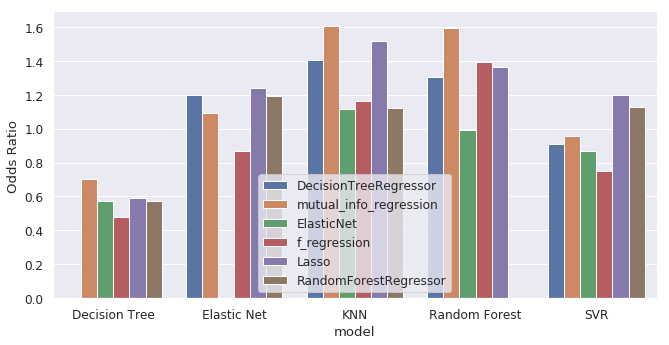

In [81]:
sns.set(font_scale=1.1)
order= ['DecisionTreeRegressor', 'ElasticNet', 'KNeighborsRegressor', 'RandomForestRegressor', 'SVR']
g = sns.catplot(x = 'model', y='OR', hue='fs', order=order,hue_order= list(clean['fs'].unique()), data=top_OR(clean, ['model', 'fs'], score='r2').reset_index(), kind='bar', height=5, aspect=1.9, legend=False)
g.set_xticklabels(['Decision Tree', 'Elastic Net', 'KNN', 'Random Forest', 'SVR'])
g.set_ylabels('Odds Ratio')
plt.legend(loc='lower center')
plt.tight_layout()
plt.savefig('graphs/adjusted-top-fs.eps', format='eps')

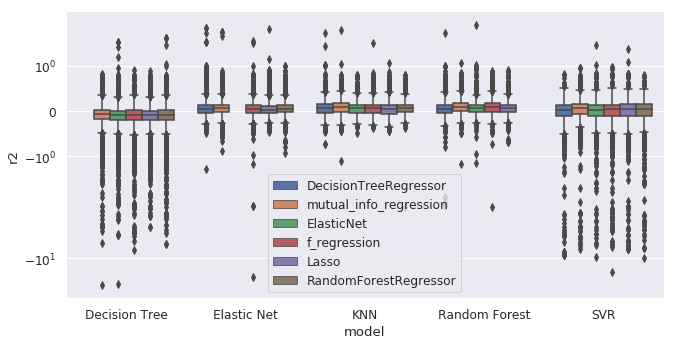

In [77]:
sns.set(font_scale=1.1)
order= ['DecisionTreeRegressor', 'ElasticNet', 'KNeighborsRegressor', 'RandomForestRegressor', 'SVR']
g = sns.catplot(x='model', y='r2', hue='fs', order=order, data=clean, kind='box',height=5, aspect=1.9, legend=False)
g.set_xticklabels(['Decision Tree', 'Elastic Net', 'KNN', 'Random Forest', 'SVR'])

plt.legend(loc='lower center')
plt.tight_layout()
g.set(yscale='symlog')
#plt.savefig('graphs/adjusted-fs.eps', format='eps')

In [90]:
#ci='sd',capsize=.05,errcolor='gray'

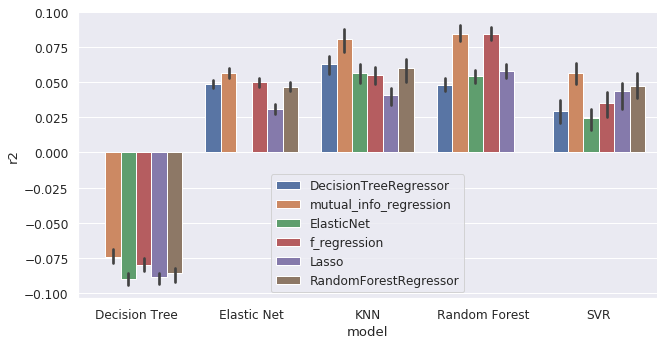

In [93]:

sns.set(font_scale=1.1)
order= ['DecisionTreeRegressor', 'ElasticNet', 'KNeighborsRegressor', 'RandomForestRegressor', 'SVR']
g = sns.catplot(x='model', y='r2', hue='fs', order=order, data=clean, kind='bar',height=5, aspect=1.9,estimator=np.median, legend=False)
g.set_xticklabels(['Decision Tree', 'Elastic Net', 'KNN', 'Random Forest', 'SVR'])

plt.legend(loc='lower center')
plt.tight_layout()
#g.set(yscale='symlog')
#plt.savefig('graphs/adjusted-fs.eps', format='eps')

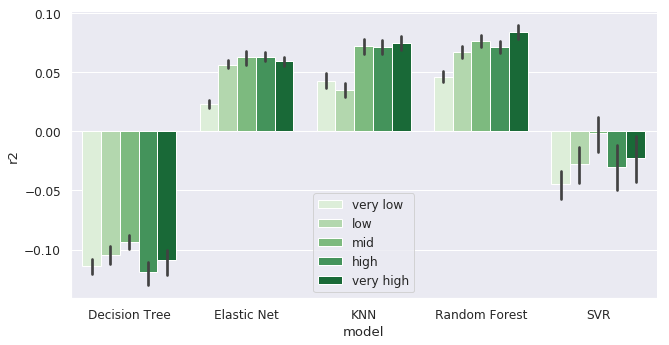

In [120]:
sns.set(font_scale=1.1)
order= ['DecisionTreeRegressor', 'ElasticNet', 'KNeighborsRegressor', 'RandomForestRegressor', 'SVR']
g = sns.catplot(x='model', y='r2', hue='catn', order=order, data=clean, kind='bar', palette='Greens',height=5, aspect=1.9, legend=False)
g.set_xticklabels(['Decision Tree', 'Elastic Net', 'KNN', 'Random Forest', 'SVR'])

plt.legend(loc='lower center')
plt.tight_layout()
#g.set(yscale='symlog')
plt.savefig('graphs/adjusted-n.eps', format='eps')

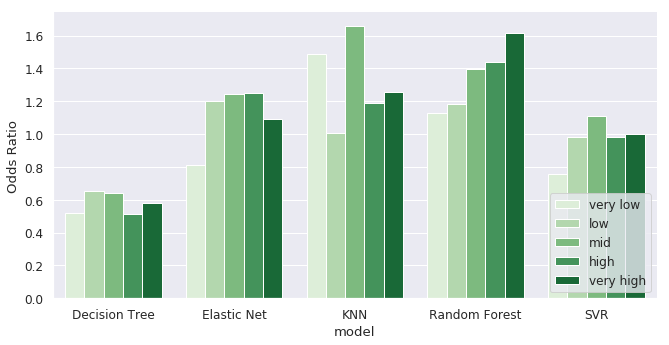

In [133]:
sns.set(font_scale=1.1)
#hue = ['DecisionTreeRegressor', 'mutual_info_regression', 'ElasticNet', 'f_regression', 'Lasso', 'RandomForestRegressor', ]
g = sns.catplot(x = 'model', y='OR', hue='catn',data=top_OR(clean, ['model', 'catn'], score='r2').reset_index(), kind='bar', palette='Greens', height=5, aspect=1.9, legend=False)
g.set_xticklabels(['Decision Tree', 'Elastic Net', 'KNN', 'Random Forest', 'SVR'])
g.set_ylabels('Odds Ratio')
plt.legend(loc='lower right')
plt.tight_layout()
#plt.savefig('graphs/adjusted-top-n.eps', format='eps')

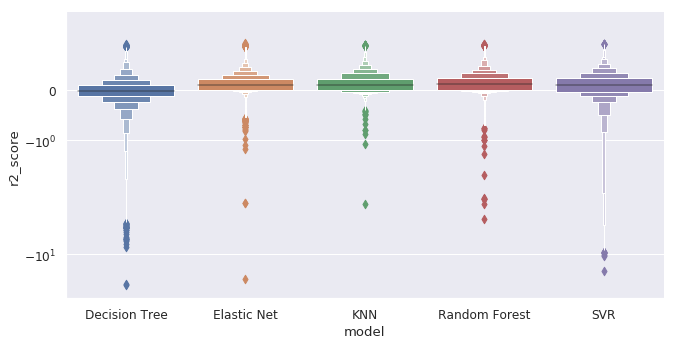

In [151]:
sns.set(font_scale=1.1)
g = sns.catplot(x='model', y='r2_score', order=order, data=clean, height=5, aspect=1.9, kind = 'boxen', legend=False)
#plt.legend(loc='lower center')
g.set_xticklabels(['Decision Tree', 'Elastic Net', 'KNN', 'Random Forest', 'SVR'])
g.set(yscale='symlog')
#plt.savefig('graphs/da-model.png')

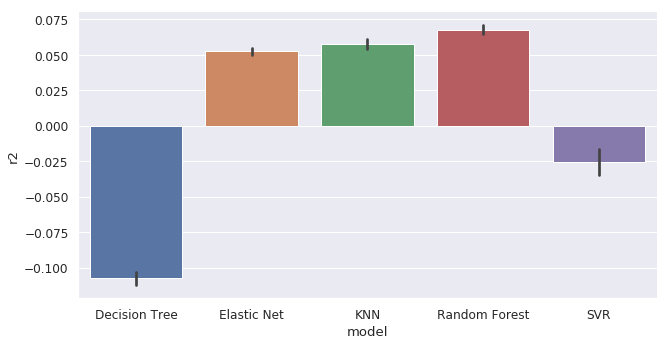

In [107]:
sns.set(font_scale=1.1)
g = sns.catplot(x='model', y='r2', order=order, data=clean, height=5, aspect=1.9, kind = 'bar', legend=False, ci=99)
#plt.legend(loc='lower center')
g.set_xticklabels(['Decision Tree', 'Elastic Net', 'KNN', 'Random Forest', 'SVR'])
#g.set(yscale='symlog')
#plt.savefig('graphs/adjusted-model.eps', format='eps')

In [56]:
def ORone(indices, rest, top, group):
    li = []
    for i in indices:
        model_t = top[(top[group[0]]==i)].shape[0]
        nmodel_t = top[(top[group[0]]!=i)].shape[0]
        model_r = rest[(rest[group[0]]==i)].shape[0]
        nmodel_r = rest[(rest[group[0]]!=i)].shape[0]
        if model_r > 0 and nmodel_r > 0:
            li.append((model_t/model_r)/(nmodel_t/nmodel_r))
        else:
            li.append(0)
    return li

In [55]:
def one_OR(data, group, q=0.95, score='r2_score'):
    top = data[data[score] >= data[score].quantile(q)]
    counts = data[group +[score]].groupby(group).count()
    topcounts = top[group +[score]].groupby(group).count()
    topcounts['OR'] = ORone(topcounts.index, data[data[score]<data[score].quantile(q)], top, group)
    return topcounts

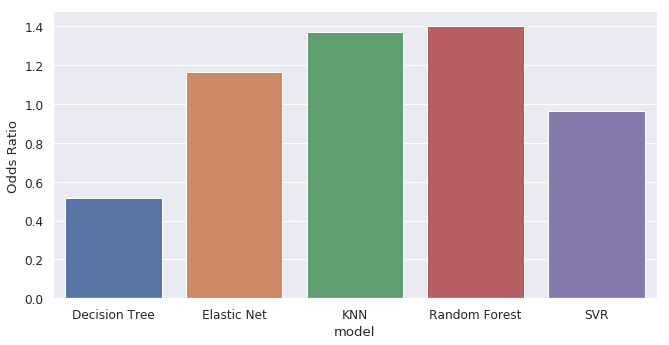

In [103]:
sns.set(font_scale=1.1)
#hue = ['DecisionTreeRegressor', 'mutual_info_regression', 'ElasticNet', 'f_regression', 'Lasso', 'RandomForestRegressor', ]
g = sns.catplot(x = 'model', y='OR',data=one_OR(clean, ['model'], score='r2').reset_index(), kind='bar', height=5, aspect=1.9, legend=False)
g.set_xticklabels(['Decision Tree', 'Elastic Net', 'KNN', 'Random Forest', 'SVR'])
g.set_ylabels('Odds Ratio')
#plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('graphs/adjusted-top-model.eps', format='eps')

# Hyper parameters

## KNN

In [98]:
knn = clean[clean['model']=='KNeighborsRegressor'][['Drug', 'fs', 'da','ajive', 'catn', 'n_neighbors', 'weights', 'algorithm', 'p','r2_score', 'r2']]

In [99]:
knn.head()

,Drug,fs,da,ajive,catn,n_neighbors,weights,algorithm,p,r2_score,r2
207,AZD6482,Lasso,none,NaN,low,29.0,uniform,ball_tree,1.0,0.416520,0.236597
208,AZD7762,Lasso,none,NaN,low,13.0,distance,ball_tree,1.0,0.377099,0.109259
209,BMS-754807,Lasso,none,NaN,low,20.0,distance,ball_tree,2.0,0.112876,0.033824
210,Dasatinib,Lasso,none,NaN,low,14.0,distance,ball_tree,1.0,0.427305,0.157184
211,Docetaxel,Lasso,none,NaN,low,24.0,distance,kd_tree,1.0,0.107432,-0.010444


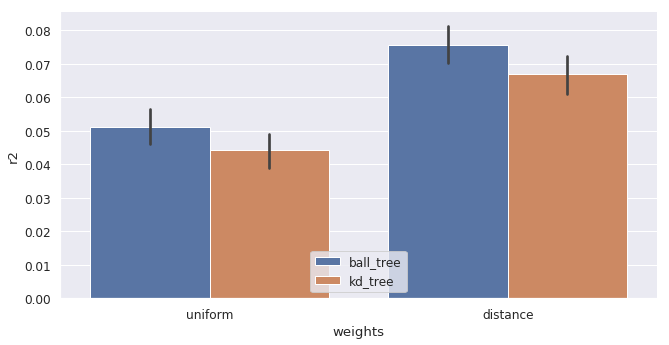

In [100]:
sns.set(font_scale=1.1)
#order= ['DecisionTreeRegressor', 'ElasticNet', 'KNeighborsRegressor', 'RandomForestRegressor', 'SVR']
g = sns.catplot(x='weights', y='r2', hue='algorithm', data=knn[knn['n_neighbors']>5], kind='bar',height=5, aspect=1.9, legend=False)
#g.set_xticklabels(['Decision Tree', 'Elastic Net', 'KNN', 'Random Forest', 'SVR'])

plt.legend(loc='lower center')
plt.tight_layout()
#g.set(yscale='symlog')
#plt.savefig('graphs/adjusted-n.eps', format='eps')

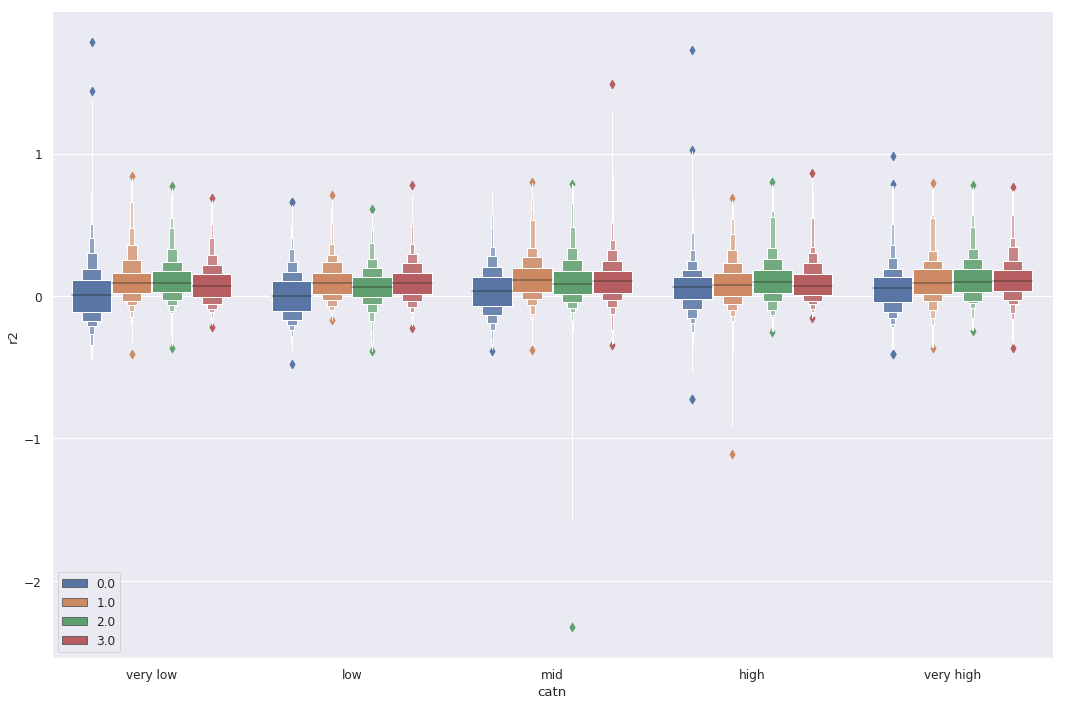

In [118]:
knn['ajive'] = knn['ajive'].fillna(0)
sns.set(font_scale=1.1)
order= ['very low', 'low', 'mid', 'high', 'very high']

g = sns.catplot(x='catn', y='r2',order=order, hue='ajive', data=knn, kind='bar',height=10, aspect=1.5, legend=False)
#g.set_xticklabels(['Decision Tree', 'Elastic Net', 'KNN', 'Random Forest', 'SVR'])

plt.legend(loc='lower left')
plt.tight_layout()
#g.set(yscale='symlog')
#plt.savefig('graphs/adjusted-n.eps', format='eps')

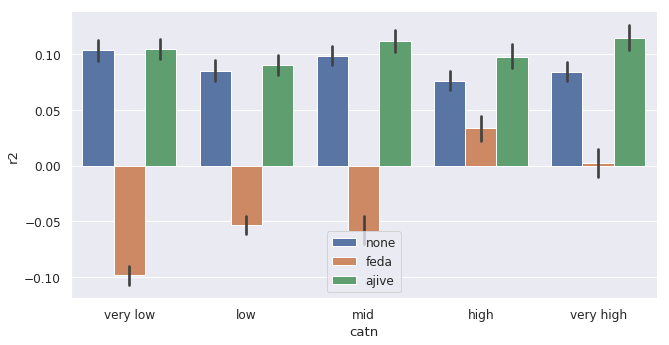

In [124]:
sns.set(font_scale=1.1)
order= ['very low', 'low', 'mid', 'high', 'very high']
g = sns.catplot(x='catn', y='r2',hue='da', data=knn,order=order, kind='bar',height=5, aspect=1.9, legend=False)
#g.set_xticklabels(['Decision Tree', 'Elastic Net', 'KNN', 'Random Forest', 'SVR'])

plt.legend(loc='lower center')
plt.tight_layout()
#g.set(yscale='symlog')
#plt.savefig('graphs/adjusted-n.eps', format='eps')

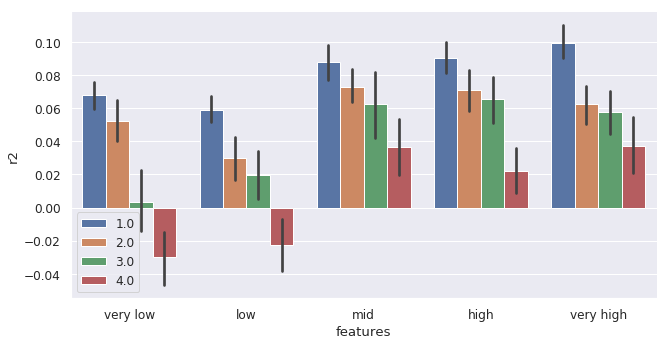

In [119]:
sns.set(font_scale=1.1)
order= ['very low', 'low', 'mid', 'high', 'very high']
g = sns.catplot(x='catn', y='r2', hue='p', data=knn,order=order, kind='bar',height=5, aspect=1.9, legend=False)
#g.set_xticklabels(['Decision Tree', 'Elastic Net', 'KNN', 'Random Forest', 'SVR'])

plt.legend(loc='lower left')
plt.tight_layout()
g.set(xlabel='features')
#g.set(yscale='symlog')
#plt.savefig('graphs/adjusted-n.eps', format='eps')

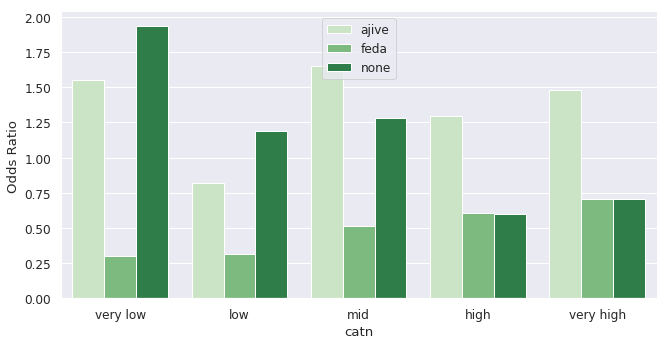

In [128]:
sns.set(font_scale=1.1)
#hue = ['DecisionTreeRegressor', 'mutual_info_regression', 'ElasticNet', 'f_regression', 'Lasso', 'RandomForestRegressor', ]
g = sns.catplot(x = 'catn', y='OR', hue='da',order=order,data=top_OR(knn, ['da', 'catn'], score='r2').reset_index(), kind='bar', palette='Greens', height=5, aspect=1.9, legend=False)
#g.set_xticklabels(['Decision Tree', 'Elastic Net', 'KNN', 'Random Forest', 'SVR'])
g.set_ylabels('Odds Ratio')
plt.legend(loc='upper center')
plt.tight_layout()
#plt.savefig('graphs/adjusted-top-n.eps', format='eps')

## Random Forest

In [132]:
rf = clean[clean['model']=='RandomForestRegressor'][['Drug', 'fs', 'da', 'catn', 'n_estimators', 'max_depth', 'max_features','r2_score', 'r2']]

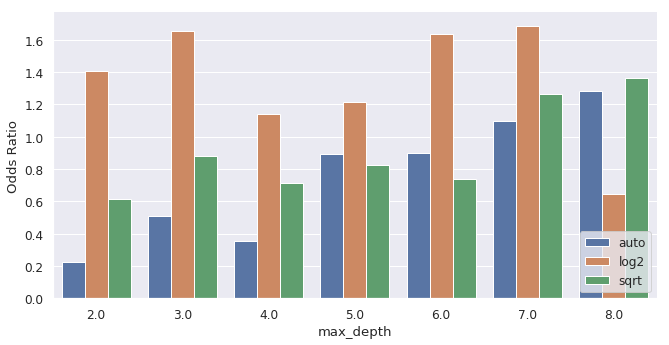

In [133]:
sns.set(font_scale=1.1)
#hue = ['DecisionTreeRegressor', 'mutual_info_regression', 'ElasticNet', 'f_regression', 'Lasso', 'RandomForestRegressor', ]
g = sns.catplot(x = 'max_depth', y='OR', hue='max_features',data=top_OR(rf, ['max_depth', 'max_features'], score='r2').reset_index(), kind='bar', height=5, aspect=1.9, legend=False)
#g.set_xticklabels(['Decision Tree', 'Elastic Net', 'KNN', 'Random Forest', 'SVR'])
g.set_ylabels('Odds Ratio')
plt.legend(loc='lower right')
plt.tight_layout()
#plt.savefig('graphs/adjusted-top-n.eps', format='eps')

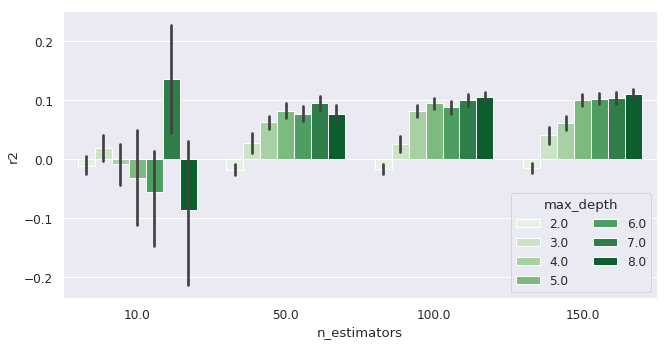

In [170]:
sns.set(font_scale=1.1)

g = sns.catplot(x='n_estimators', y='r2', hue='max_depth', data=rf, kind='bar',palette='Greens',height=5, aspect=1.9, legend=False)
#order= ['DecisionTreeRegressor', 'ElasticNet', 'KNeighborsRegressor', 'RandomForestRegressor', 'SVR']



#g.set_xticklabels(['Decision Tree', 'Elastic Net', 'KNN', 'Random Forest', 'SVR'])

plt.legend(title='max_depth',ncol=2)
plt.tight_layout()
#g.set(yscale='symlog')
#plt.savefig('graphs/adjusted-depth.eps', format='eps')

No handles with labels found to put in legend.


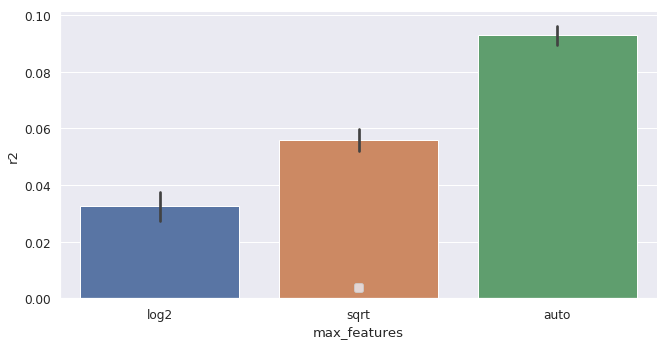

In [137]:
sns.set(font_scale=1.1)
#order= ['DecisionTreeRegressor', 'ElasticNet', 'KNeighborsRegressor', 'RandomForestRegressor', 'SVR']
g = sns.catplot(x='max_features', y='r2', data=rf, kind='bar',height=5, aspect=1.9, legend=False)
#g.set_xticklabels(['Decision Tree', 'Elastic Net', 'KNN', 'Random Forest', 'SVR'])

plt.legend(loc='lower center')
plt.tight_layout()
#g.set(yscale='symlog')
#plt.savefig('graphs/adjusted-depth.eps', format='eps')

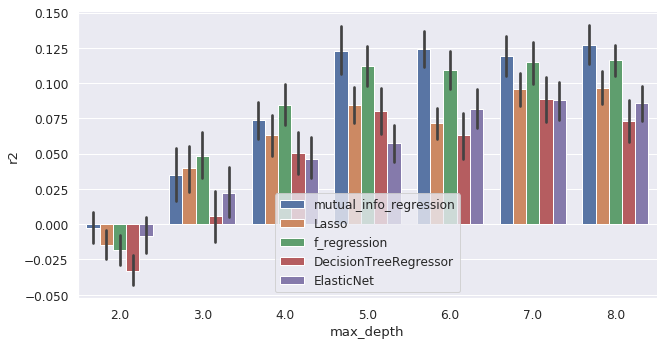

In [135]:
sns.set(font_scale=1.1)
#order= ['DecisionTreeRegressor', 'ElasticNet', 'KNeighborsRegressor', 'RandomForestRegressor', 'SVR']
g = sns.catplot(x='max_depth', y='r2', hue='fs', data=rf, kind='bar',height=5, aspect=1.9, legend=False)
#g.set_xticklabels(['Decision Tree', 'Elastic Net', 'KNN', 'Random Forest', 'SVR'])

plt.legend(loc='lower center')
plt.tight_layout()
#g.set(yscale='symlog')
#plt.savefig('graphs/adjusted-n.eps', format='eps')

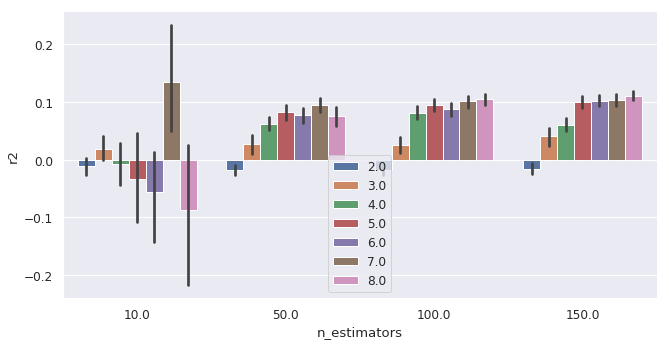

In [132]:
sns.set(font_scale=1.1)
#order= ['DecisionTreeRegressor', 'ElasticNet', 'KNeighborsRegressor', 'RandomForestRegressor', 'SVR']
g = sns.catplot(x='n_estimators', y='r2', hue='max_depth', data=rf, kind='bar',height=5, aspect=1.9, legend=False)
#g.set_xticklabels(['Decision Tree', 'Elastic Net', 'KNN', 'Random Forest', 'SVR'])

plt.legend(loc='lower center')
plt.tight_layout()
#g.set(yscale='symlog')
#plt.savefig('graphs/adjusted-n.eps', format='eps')

## Elastic Net

In [133]:
en = clean[clean['model']=='ElasticNet'][['Drug', 'fs', 'da', 'catn', 'alpha', 'l1_ratio','r2_score', 'r2']]

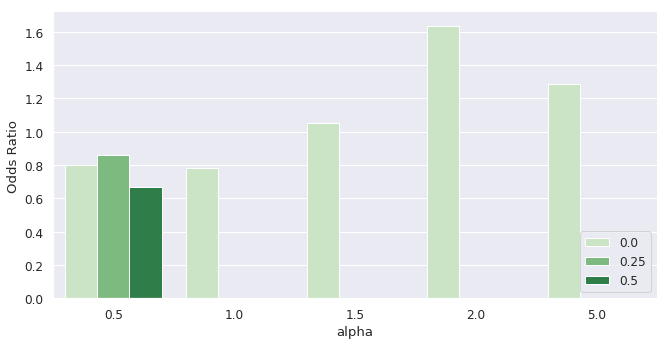

In [142]:
sns.set(font_scale=1.1)
#hue = ['DecisionTreeRegressor', 'mutual_info_regression', 'ElasticNet', 'f_regression', 'Lasso', 'RandomForestRegressor', ]
g = sns.catplot(x = 'alpha', y='OR', hue='l1_ratio',data=top_OR(en, ['l1_ratio', 'alpha'], score='r2').reset_index(), kind='bar', palette='Greens', height=5, aspect=1.9, legend=False)
#g.set_xticklabels(['Decision Tree', 'Elastic Net', 'KNN', 'Random Forest', 'SVR'])
g.set_ylabels('Odds Ratio')
plt.legend(loc='lower right')
plt.tight_layout()
#plt.savefig('graphs/adjusted-top-n.eps', format='eps')

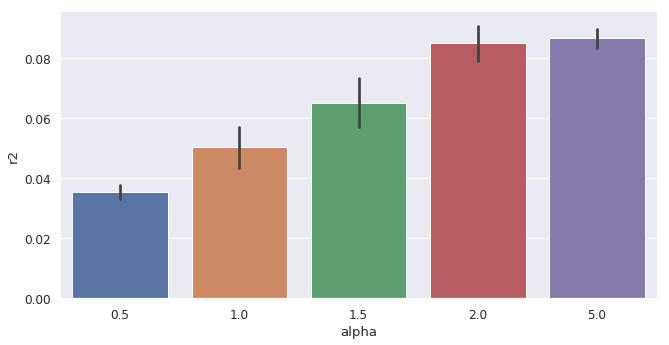

In [138]:
sns.set(font_scale=1.1)
#order= ['DecisionTreeRegressor', 'ElasticNet', 'KNeighborsRegressor', 'RandomForestRegressor', 'SVR']
g = sns.catplot(x='alpha', y='r2', data=en, kind='bar',height=5, aspect=1.9, legend=False)
#g.set_xticklabels(['Decision Tree', 'Elastic Net', 'KNN', 'Random Forest', 'SVR'])

#plt.legend(loc='lower center')
plt.tight_layout()
#g.set(yscale='symlog')
#plt.savefig('graphs/adjusted-n.eps', format='eps')

In [60]:
one_OR(clean, ['model', 'da'], score='r2').reset_index()

,model,da,r2,OR
0,DecisionTreeRegressor,ajive,633,0
1,DecisionTreeRegressor,feda,98,0
2,DecisionTreeRegressor,none,265,0
3,ElasticNet,ajive,1040,0
4,ElasticNet,feda,318,0
5,ElasticNet,none,662,0
6,KNeighborsRegressor,ajive,407,0
7,KNeighborsRegressor,feda,100,0
8,KNeighborsRegressor,none,362,0
9,RandomForestRegressor,ajive,545,0


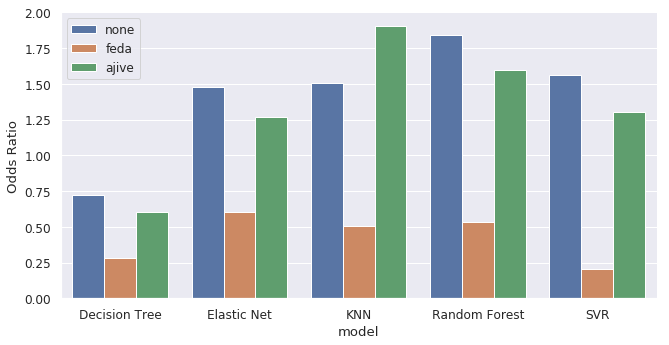

In [79]:
sns.set(font_scale=1.1)
hue = ['DecisionTreeRegressor', 'ElasticNet', 'KNeighborsRegressor', 'RandomForestRegressor', 'SVR']
g = sns.catplot(x = 'model', hue='da',hue_order = list(clean['da'].unique()), y='OR',data=top_OR(clean, ['model', 'da'], score='r2').reset_index(), kind='bar', height=5, aspect=1.9, legend=False)
g.set_xticklabels(['Decision Tree', 'Elastic Net', 'KNN', 'Random Forest', 'SVR'])
g.set_ylabels('Odds Ratio')
plt.legend()
plt.tight_layout()
plt.savefig('graphs/adjusted-top-da.eps', format='eps')

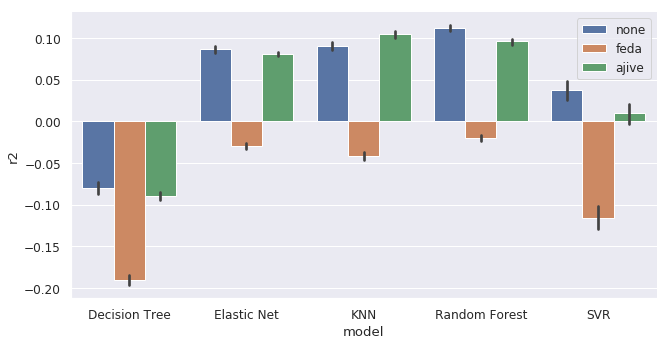

In [78]:
sns.set(font_scale=1.1)
hue = ['DecisionTreeRegressor', 'ElasticNet', 'KNeighborsRegressor', 'RandomForestRegressor', 'SVR']
g = sns.catplot(x = 'model', hue='da', order=hue,data=clean, y='r2', kind='bar', height=5, aspect=1.9, legend=False)
g.set_xticklabels(['Decision Tree', 'Elastic Net', 'KNN', 'Random Forest', 'SVR'])
plt.legend()
plt.tight_layout()
plt.savefig('graphs/adjusted-da.eps', format='eps')

In [75]:
list(clean['norm'].unique())

['StandardScaler',
 'MinMaxScaler',
 'MaxAbsScaler',
 'QuantileTransformer',
 'None']

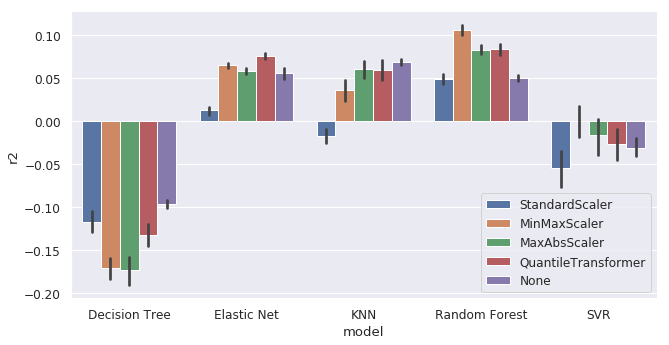

In [72]:
sns.set(font_scale=1.1)
hue = ['DecisionTreeRegressor', 'ElasticNet', 'KNeighborsRegressor', 'RandomForestRegressor', 'SVR']
g = sns.catplot(x = 'model', hue='norm', order=hue, hue_order = list(clean['norm'].unique()),data=clean, y='r2', kind='bar', height=5, aspect=1.9, legend=False)
g.set_xticklabels(['Decision Tree', 'Elastic Net', 'KNN', 'Random Forest', 'SVR'])
plt.legend()
plt.tight_layout()
plt.savefig('graphs/adjusted-norm.eps', format='eps')

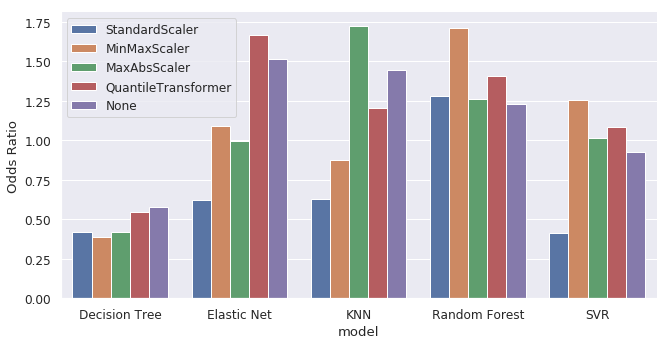

In [77]:
sns.set(font_scale=1.1)
hue = ['DecisionTreeRegressor', 'ElasticNet', 'KNeighborsRegressor', 'RandomForestRegressor', 'SVR']
g = sns.catplot(x = 'model', hue='norm',order=hue, hue_order = list(clean['norm'].unique()), y='OR',data=top_OR(clean, ['model', 'norm'], score='r2').reset_index(), kind='bar', height=5, aspect=1.9, legend=False)
g.set_xticklabels(['Decision Tree', 'Elastic Net', 'KNN', 'Random Forest', 'SVR'])
g.set_ylabels('Odds Ratio')
plt.legend()
plt.tight_layout()
plt.savefig('graphs/adjusted-top-norm.eps', format='eps')